In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Cardiotocographic.csv",index_col=0)
df

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,,,,,,,,,,,,,
120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464


In [15]:
df.isna().sum()

AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [16]:
df.dtypes

AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [17]:
for i in df.isna().sum():
    print((i/len(df))*100)

0.940733772342427
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.9877704609595485
0.9877704609595485


As the percentage of missing values is less than 4% so 
we will drop the observation

In [18]:
df=df.dropna()

In [19]:
df.isna().sum()

AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

<Axes: >

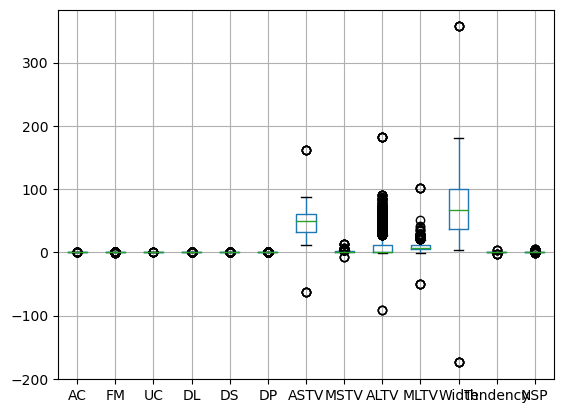

In [20]:
df.boxplot()

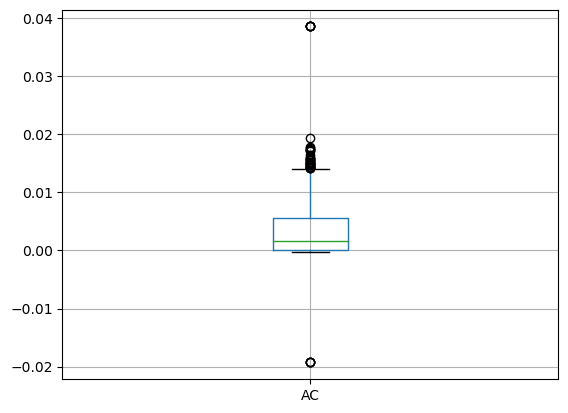

In [29]:
#import matplotlib.pyplot as plt
df.boxplot('AC')
plt.show()

In [ ]:
df.boxplot('AC')
plt.show()

In [30]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    return upper,lower  

In [31]:
outlier_detection(df,df.columns)

(AC            0.014124
 FM            0.006386
 UC            0.013583
 DL            0.008224
 DS            0.000000
 DP            0.000000
 ASTV        104.500000
 MSTV          3.200000
 ALTV         27.500000
 MLTV         20.350000
 Width       194.500000
 Tendency      2.500000
 NSP           1.000000
 dtype: float64,
 AC          -0.008475
 FM          -0.003831
 UC          -0.005209
 DL          -0.004934
 DS           0.000000
 DP           0.000000
 ASTV       -11.500000
 MSTV        -0.800000
 ALTV       -16.500000
 MLTV        -4.850000
 Width      -57.500000
 Tendency    -1.500000
 NSP          1.000000
 dtype: float64)

In [42]:
from scipy import stats

z_scores = stats.zscore(df)
z_scores
threshold = 3

df = df[(abs(z_scores) < threshold).all(axis=1)]


print("Shape of cleaned DataFrame:", df_cleaned.shape)
df

Shape of cleaned DataFrame: (1562, 13)


,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,,,,,,,,,,,,,
120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.000000
140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464


In [43]:
mean_values = df.mean()
median_values = df.median()
std_values = df.std()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values,
    'Interquartile Range': IQR
})

print("Statistical Summary:")
print(summary_stats)


Statistical Summary:
                  Mean     Median  Standard Deviation  Interquartile Range
AC        3.290361e-03   0.002029        3.653907e-03             0.005859
FM        2.478147e-03   0.000000        6.025188e-03             0.001878
UC        4.409998e-03   0.004554        2.849879e-03             0.004399
DL        1.491917e-03   0.000000        2.405364e-03             0.002495
DS        2.594527e-09   0.000000        1.426617e-07             0.000000
DP        2.293586e-05   0.000000        1.511000e-04             0.000000
ASTV      4.608645e+01  47.000000        1.611275e+01            27.000000
MSTV      1.186501e+00   1.100000        6.401794e-01             0.800000
ALTV      8.295166e+00   0.000000        1.425960e+01            11.000000
MLTV      8.452801e+00   7.900000        4.602534e+00             5.600000
Width     6.591852e+01  60.000000        3.538408e+01            57.775153
Tendency  3.521474e-01   0.000000        5.925877e-01             1.000000
NSP 

<Figure size 640x480 with 0 Axes>

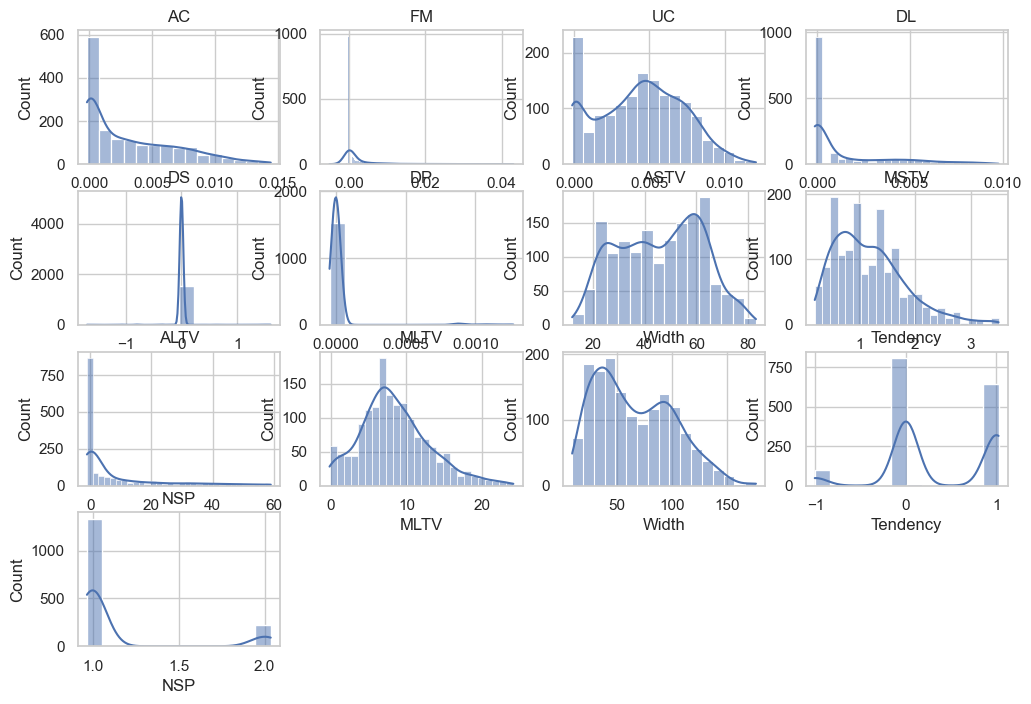

<Figure size 640x480 with 0 Axes>

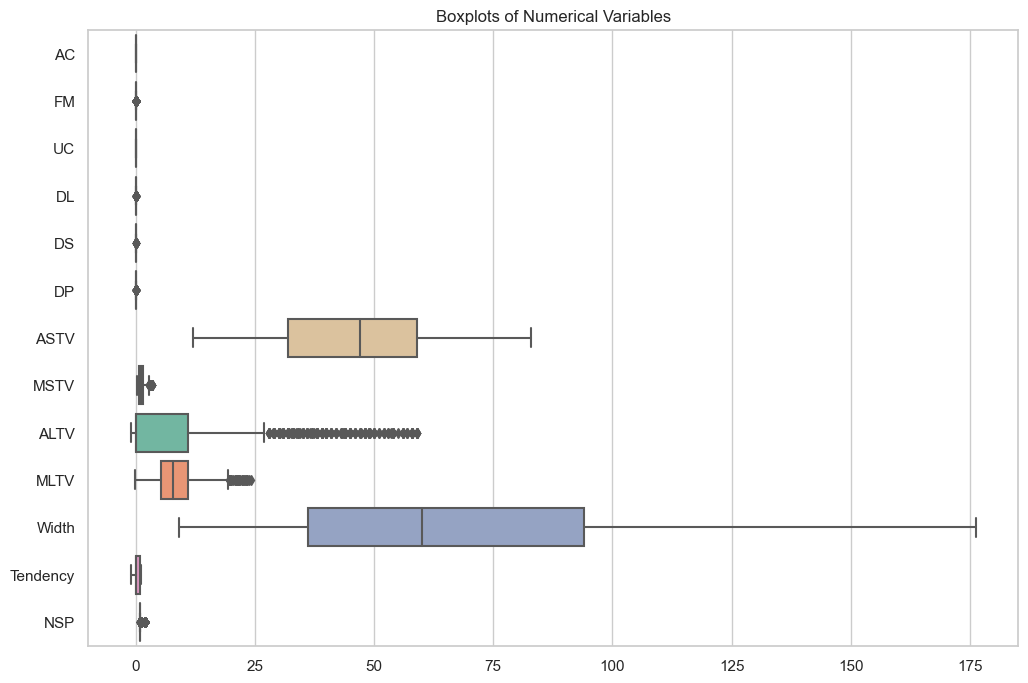

<Figure size 640x480 with 0 Axes>

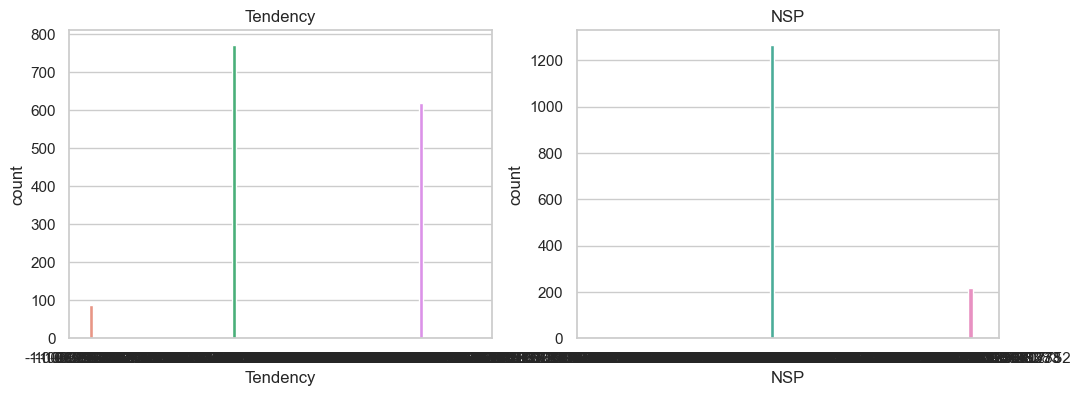

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

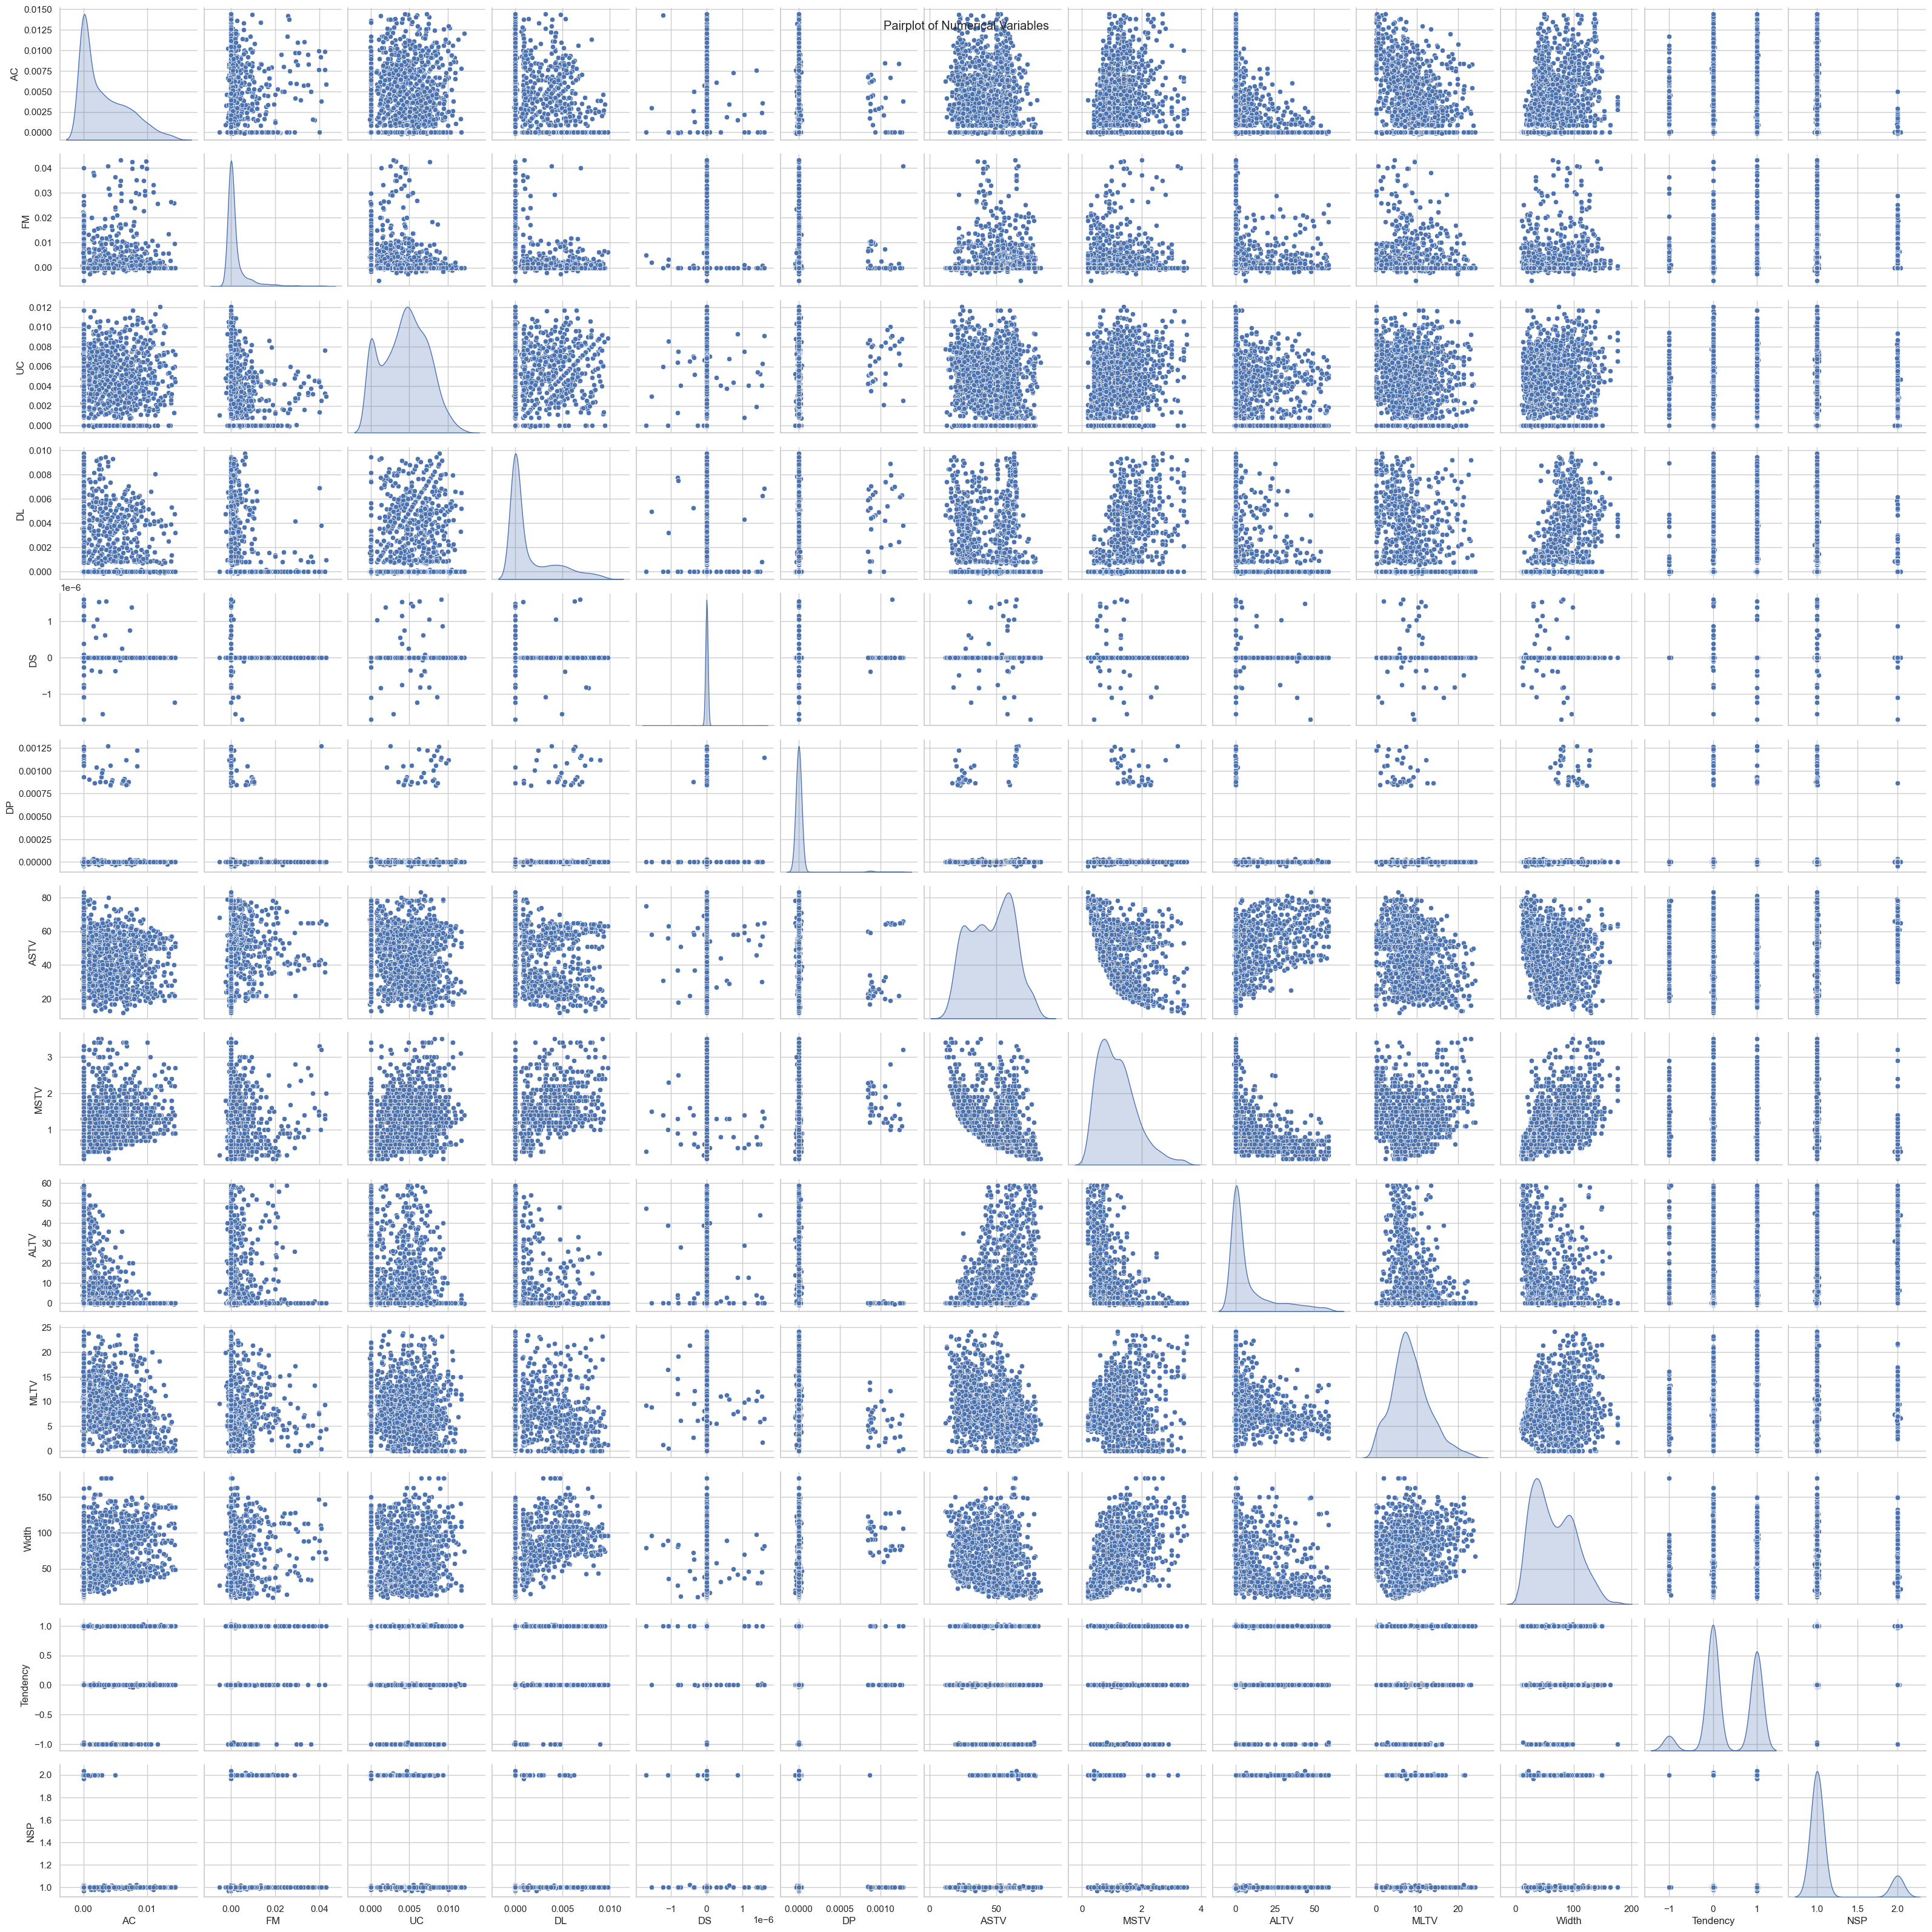

<Figure size 640x480 with 0 Axes>

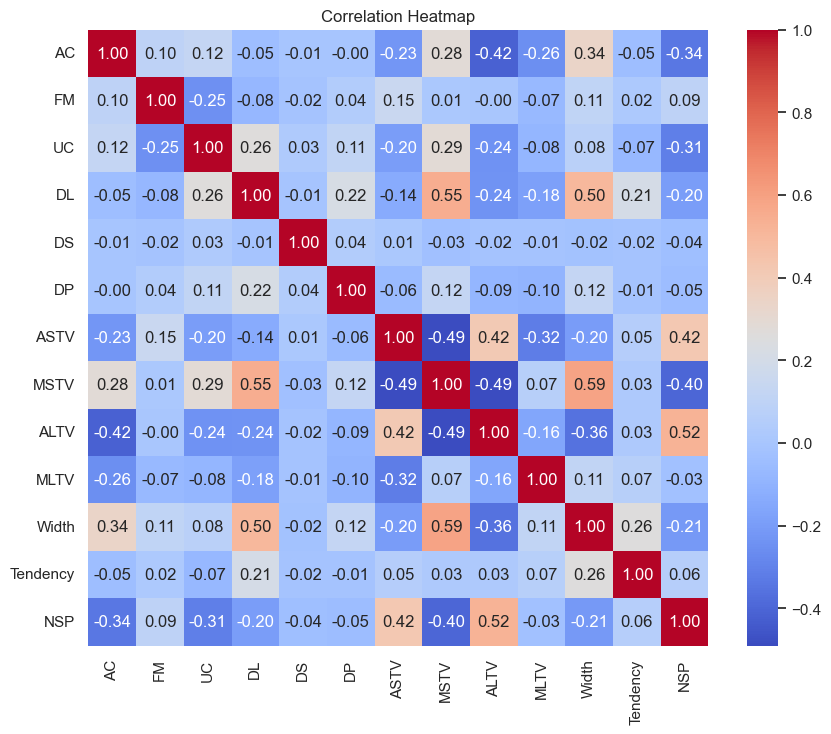

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_vars = ['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[var], kde=True)
    plt.title(var)
plt.show()
plt.tight_layout()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_vars], orient="h", palette="Set2")
plt.title("Boxplots of Numerical Variables")
plt.show()
plt.tight_layout()

categorical_vars = ['Tendency', 'NSP']  
plt.figure(figsize=(12, 4))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=var, data=df)
    plt.title(var)
plt.show()
plt.tight_layout()

plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_vars], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Variables")
plt.show()
plt.tight_layout()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
plt.tight_layout()

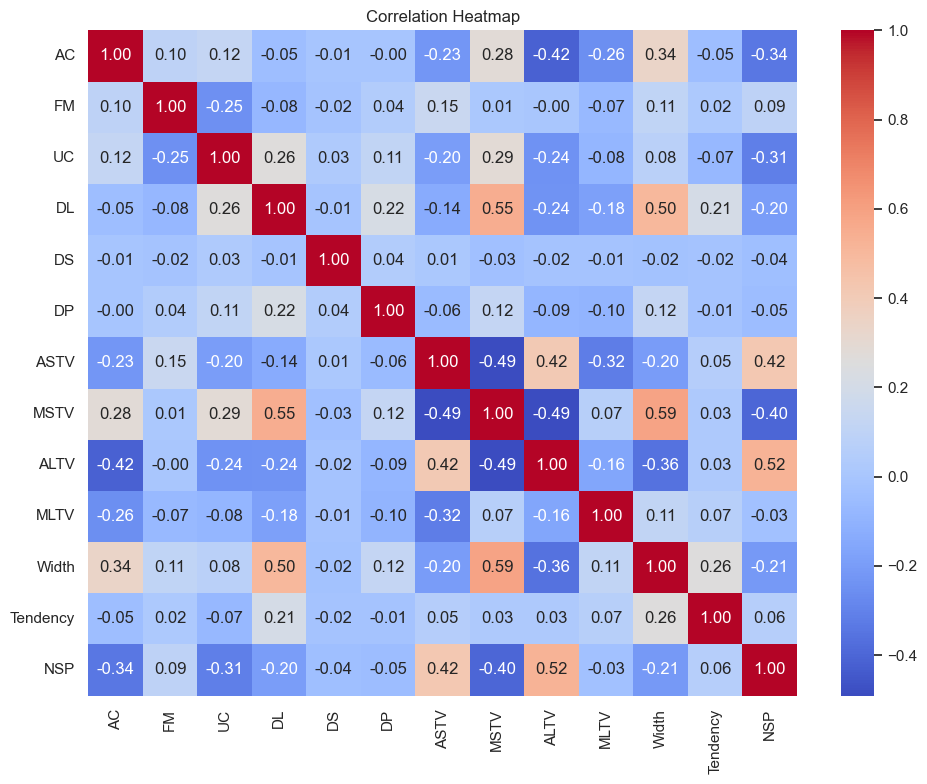

In [50]:
# Identify correlations between variables
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# If temporal data is available, you can look for trends or patterns over time
# Assuming you have a column named 'Timestamp' for temporal data
if 'Timestamp' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Timestamp', y='LB', data=df, marker='o', color='blue', label='LB')
    plt.xlabel("Timestamp")
    plt.ylabel("LB")
    plt.title("Trend of LB Over Time")
    plt.tight_layout()
    plt.show()
    
    
